<a href="https://colab.research.google.com/github/ANJEEV123/TNSDC_GEN_AI/blob/main/sales_practise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install the needed libraries
!pip install pandas matplotlib seaborn numpy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/train.csv')

# Display basic information
print(df.info())

# Handle missing values
df.dropna(inplace=True)

# Convert 'Order Date' to datetime with the correct format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
# The format argument specifies the date format in your data

# Remove duplicates
df.drop_duplicates(inplace=True)

# Calculate total and average sales
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

average_sales = df['Sales'].mean()
print(f'Average Sales: ${average_sales:,.2f}')

# Calculate monthly sales
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month'],
      dtype='object')


<ipython-input-7-4e2db2becbc2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


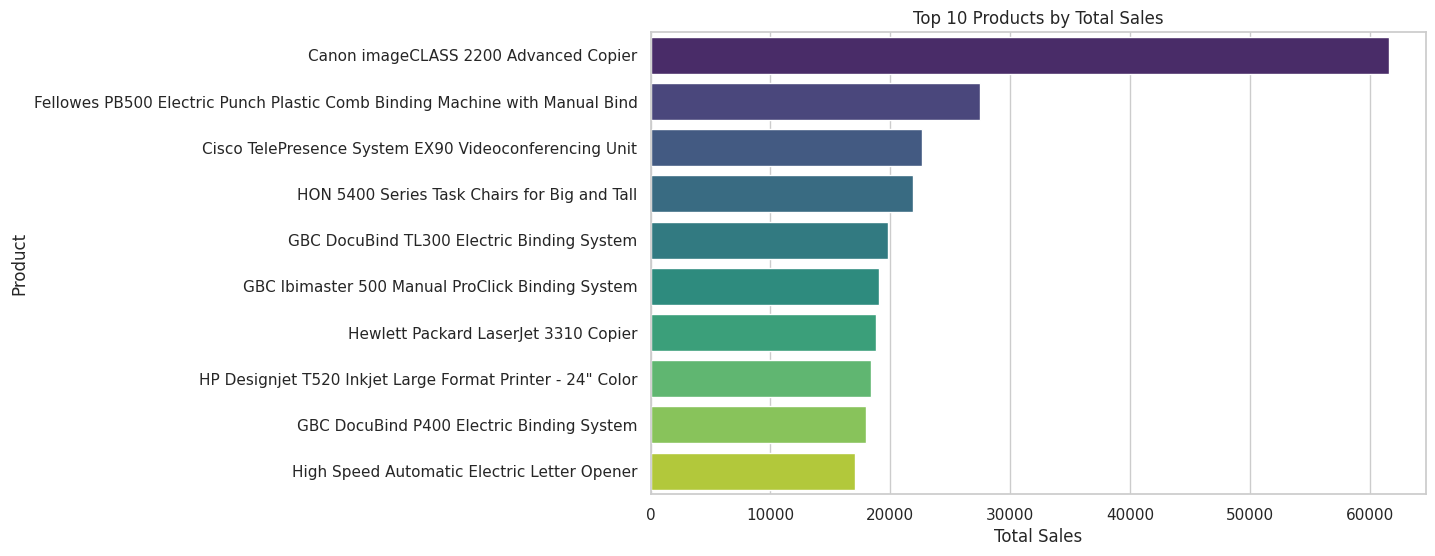

In [ ]:

print(df.columns)


product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

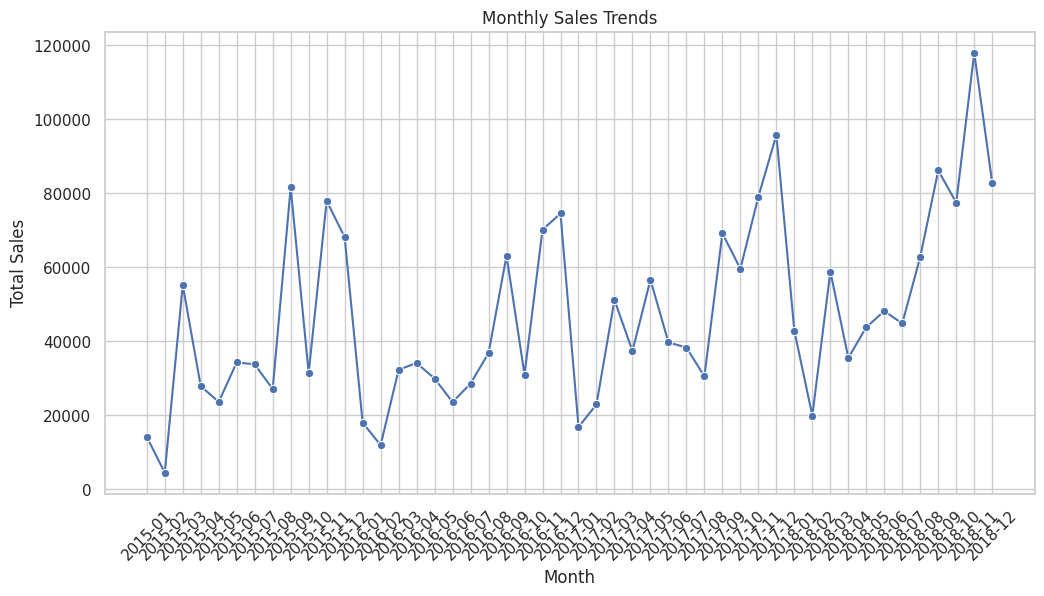

In [ ]:

monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Now create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Top 5 products by total sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)  # Changed 'Product' to 'Product Name'
print('Top 5 Products by Total Sales:')
print(top_products)

# Top 5 regions by total sales
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(5)
print('\nTop 5 Regions by Total Sales:')
print(top_regions)

Top 5 Products by Total Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

Top 5 Regions by Total Sales:
Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64
